<a href="https://colab.research.google.com/github/Gaeli75/Machine-Learning-Pratices/blob/main/British_Airways_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important/Basiccs Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importing database


In [2]:
df = pd.read_csv("/content/customer_booking.csv", encoding = 'unicode_escape')

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7}

In [8]:
df['flight_day'] = df['flight_day'].map(mapping)

In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


**Analise of Data to see whom contain outlier and Noise**( Have cross check most of feautures to see which one contain outlier since my dataset has few feautures analised all and focused on the one which has oulier and is the one below.)


Text(0.5, 1.0, 'Analise distribution')

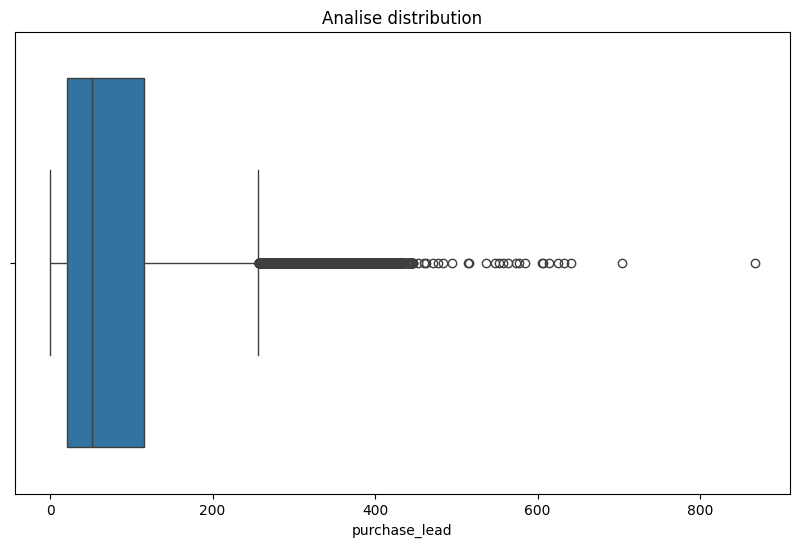

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['purchase_lead'])
plt.title("Analise distribution")

In [ ]:
#Only purchased lead data seem to have outliers I will tried to fix it


In [65]:
#To Reduce Purchase Outilier and Noise using winsorize
from scipy.stats.mstats import winsorize
pd.options.mode.copy_on_write = True
df['purchase_lead'] = winsorize(df['purchase_lead'], limits=[0.05, 0.05])

Text(0.5, 1.0, 'Analise distribution')

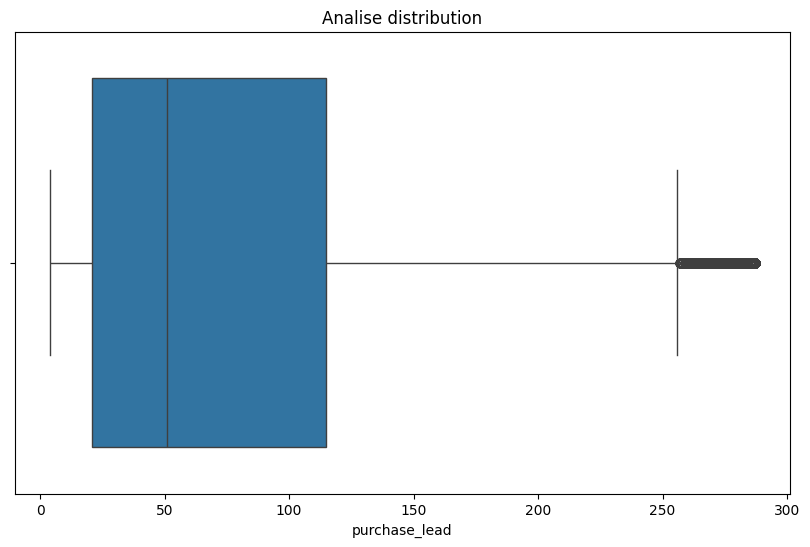

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['purchase_lead'])
plt.title("Analise distribution")

Creating Pipilines


In [ ]:
Model Building
#decided to go directly to model building as most of data wont be organize and linear since every customer is different

In [81]:
#importing fav notebooka
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

In [82]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        # ("scaler", MinMaxScaler())
    ]
)

In [83]:
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", TargetEncoder(target_type='continuous')),
    ]
)

In [84]:
from sklearn.compose import make_column_selector

In [85]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_include=np.number)),
        ("cat", categorical_transformer, make_column_selector(dtype_include=object)),
    ],
    verbose_feature_names_out=False  # Prevents adding transformer names as prefixes
)

In [86]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [87]:
features = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day','wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'booking_complete']

In [88]:
dfk = df[features]

In [95]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Fiting the data at Random Forrest

In [97]:
rf_regr = RandomForestClassifier(
    n_estimators=1000,
    max_depth=5, min_samples_split=20, min_samples_leaf=20,
    max_features=0.8
)

In [98]:
rfr = Pipeline([
    ('pp', preprocessor),
    ('regr', rf_regr)
])

In [99]:
rfr.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b56b8fc1350>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(target_type='continuous'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b56b8fc31d0>)],
                                   verbose_feature_names_out=False)),
                ('regr',
                 RandomForestClassifier(max_depth=5, max_features=0.8,
                                        min_samples_leaf=20,
                                        min_samples_split=20,
                                        n_estimators=1000))])

In [100]:
rfr.score(X_train, y_train)

0.8501

In [101]:
rfr.score(X_test, y_test)

0.8521

Cross Validation of the Data

In [102]:
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross Validation
cv_scores = cross_val_score(rfr, X_train, y_train, cv=5, scoring='accuracy')

# Print mean and standard deviation of CV scores
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-Validation Accuracy: 0.8501 ± 0.0004


✔ High Accuracy (85.01%) → The model predicts correctly 85.01% of the time.
✔ Low Standard Deviation (± 0.0004) → The accuracy is very stable across different train-test splits.
✔ Reliable Performance → Since the variation in accuracy is very small (0.04%), the model is consistent.